# Fun with Pandas

We will use data from the [ergast API](https://ergast.com/mrd/) for the following examples.

[Ergast Postman collection with documentation](https://documenter.getpostman.com/view/11586746/SztEa7bL)

## What's a Dataframe again?
A **DataFrame** is composed of one or more **Series**. 
The names of the **Series** form the column names, and the row labels form the **Index**.

You may create a Dataframe in multiple ways, i.e.
* data from a file - df.read_csv(...)
* data from an API - df = pd.Dataframe(json_payload)
* data from a db
* ...



In [1]:
# first, install the requirements
%pip install -r ../requirements.txt >> results/requirements_log.txt

Note: you may need to restart the kernel to use updated packages.


In [15]:
# import the needed libraries
import requests
import pandas as pd
import numpy as np

In [3]:
# analyse a sample

url = 'https://ergast.com/api/f1/2022.json'
r = requests.get(url)
j = r.json()

df = pd.DataFrame(j['MRData']['RaceTable']['Races'])

df.head()


,season,round,url,raceName,Circuit,date,time,FirstPractice,SecondPractice,ThirdPractice,Qualifying,Sprint
0,2022,1,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,Bahrain Grand Prix,"{'circuitId': 'bahrain', 'url': 'http://en.wik...",2022-03-20,15:00:00Z,"{'date': '2022-03-18', 'time': '12:00:00Z'}","{'date': '2022-03-18', 'time': '15:00:00Z'}","{'date': '2022-03-19', 'time': '12:00:00Z'}","{'date': '2022-03-19', 'time': '15:00:00Z'}",NaN
1,2022,2,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,Saudi Arabian Grand Prix,"{'circuitId': 'jeddah', 'url': 'http://en.wiki...",2022-03-27,17:00:00Z,"{'date': '2022-03-25', 'time': '14:00:00Z'}","{'date': '2022-03-25', 'time': '17:00:00Z'}","{'date': '2022-03-26', 'time': '14:00:00Z'}","{'date': '2022-03-26', 'time': '17:00:00Z'}",NaN
2,2022,3,http://en.wikipedia.org/wiki/2022_Australian_G...,Australian Grand Prix,"{'circuitId': 'albert_park', 'url': 'http://en...",2022-04-10,05:00:00Z,"{'date': '2022-04-08', 'time': '03:00:00Z'}","{'date': '2022-04-08', 'time': '06:00:00Z'}","{'date': '2022-04-09', 'time': '03:00:00Z'}","{'date': '2022-04-09', 'time': '06:00:00Z'}",NaN
3,2022,4,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,Emilia Romagna Grand Prix,"{'circuitId': 'imola', 'url': 'http://en.wikip...",2022-04-24,13:00:00Z,"{'date': '2022-04-22', 'time': '11:30:00Z'}","{'date': '2022-04-23', 'time': '10:30:00Z'}",NaN,"{'date': '2022-04-22', 'time': '15:00:00Z'}","{'date': '2022-04-23', 'time': '14:30:00Z'}"
4,2022,5,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,Miami Grand Prix,"{'circuitId': 'miami', 'url': 'http://en.wikip...",2022-05-08,19:30:00Z,"{'date': '2022-05-06', 'time': '18:30:00Z'}","{'date': '2022-05-06', 'time': '21:30:00Z'}","{'date': '2022-05-07', 'time': '17:00:00Z'}","{'date': '2022-05-07', 'time': '20:00:00Z'}",NaN


In [4]:
# pull the f1 2022 season races information from the ergast API

f1_races_2022 = {
    'season': [],
    'round': [],
    'circuit_id': [],
    'raceName': [],
    'url': [],
    'LAT': [],
    'LONG': [],
    'locality': [],
    'country': [],
    'date': [],
    'time': []
}

url = 'https://ergast.com/api/f1/2022.json'
r = requests.get(url)
print(r)
j = r.json()

for item in j['MRData']['RaceTable']['Races']:
    try:
        f1_races_2022['season'].append(int(item['season']))
        f1_races_2022['round'].append(int(item['round']))
        f1_races_2022['circuit_id'].append(item['Circuit']['circuitId'])
        f1_races_2022['raceName'].append(item['raceName'])
        f1_races_2022['url'].append(item['url'])
        f1_races_2022['LAT'].append(float(item['Circuit']['Location']['lat']))
        f1_races_2022['LONG'].append(float(item['Circuit']['Location']['long']))
        f1_races_2022['locality'].append(item['Circuit']['Location']['locality'])
        f1_races_2022['country'].append(item['Circuit']['Location']['country'])
        f1_races_2022['date'].append(item['date'])
        f1_races_2022['time'].append(item.get('time'))
    except Exception as e:
        print(f'Error adding item: {item}')
        print(e)
        raise

f1_races_2022 = pd.DataFrame(f1_races_2022)
f1_races_2022

<Response [200]>


,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
0,2022,1,bahrain,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,26.0325,50.51060,Sakhir,Bahrain,2022-03-20,15:00:00Z
1,2022,2,jeddah,Saudi Arabian Grand Prix,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,21.6319,39.10440,Jeddah,Saudi Arabia,2022-03-27,17:00:00Z
2,2022,3,albert_park,Australian Grand Prix,http://en.wikipedia.org/wiki/2022_Australian_G...,-37.8497,144.96800,Melbourne,Australia,2022-04-10,05:00:00Z
3,2022,4,imola,Emilia Romagna Grand Prix,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,44.3439,11.71670,Imola,Italy,2022-04-24,13:00:00Z
4,2022,5,miami,Miami Grand Prix,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,25.9581,-80.23890,Miami,USA,2022-05-08,19:30:00Z
5,2022,6,catalunya,Spanish Grand Prix,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,41.5700,2.26111,Montmeló,Spain,2022-05-22,13:00:00Z
6,2022,7,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,2022-05-29,13:00:00Z
7,2022,8,baku,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,40.3725,49.85330,Baku,Azerbaijan,2022-06-12,11:00:00Z
8,2022,9,villeneuve,Canadian Grand Prix,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,45.5000,-73.52280,Montreal,Canada,2022-06-19,18:00:00Z
9,2022,10,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/2022_British_Gran...,52.0786,-1.01694,Silverstone,UK,2022-07-03,14:00:00Z


In [16]:
# in order not to stress the API, use the backup file for the historical data
f1_races = pd.read_csv('./resources/f1_races.csv', index_col=0)

In [17]:
f1_races.head()

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
0,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,1950-05-13,NaN
1,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,NaN
2,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,1950-05-30,NaN
3,1950,4,bremgarten,Swiss Grand Prix,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,46.9589,7.40194,Bern,Switzerland,1950-06-04,NaN
4,1950,5,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,1950-06-18,NaN


### Series

In [24]:
f1_races.circuit_id

date
1950-05-13     silverstone
1950-05-21          monaco
1950-05-30    indianapolis
1950-06-04      bremgarten
1950-06-18             spa
                  ...     
2022-10-09          suzuka
2022-10-23        americas
2022-10-30       rodriguez
2022-11-13      interlagos
2022-11-20      yas_marina
Name: circuit_id, Length: 1079, dtype: object

### Columns

In [25]:
f1_races.columns

Index(['season', 'round', 'circuit_id', 'raceName', 'url', 'LAT', 'LONG',
       'locality', 'country', 'time'],
      dtype='object')

### Index

In [26]:
f1_races.index

Index(['1950-05-13', '1950-05-21', '1950-05-30', '1950-06-04', '1950-06-18',
       '1950-07-02', '1950-09-03', '1951-05-27', '1951-05-30', '1951-06-17',
       ...
       '2022-07-31', '2022-08-28', '2022-09-04', '2022-09-11', '2022-10-02',
       '2022-10-09', '2022-10-23', '2022-10-30', '2022-11-13', '2022-11-20'],
      dtype='object', name='date', length=1079)

### Inspect the data

In [27]:
f1_races.shape

(1079, 10)

### What are the column data types?

In [28]:
f1_races.dtypes

season          int64
round           int64
circuit_id     object
raceName       object
url            object
LAT           float64
LONG          float64
locality       object
country        object
time           object
dtype: object

### What does the data look like?

In [29]:
f1_races.head(5)

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,time
date,,,,,,,,,,
1950-05-13,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,NaN
1950-05-21,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,NaN
1950-05-30,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,NaN
1950-06-04,1950,4,bremgarten,Swiss Grand Prix,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,46.9589,7.40194,Bern,Switzerland,NaN
1950-06-18,1950,5,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,NaN


In [30]:
f1_races.tail(5)

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,time
date,,,,,,,,,,
2022-10-09,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.5410,Suzuka,Japan,05:00:00Z
2022-10-23,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.6411,Austin,USA,19:00:00Z
2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,19.4042,-99.0907,Mexico City,Mexico,20:00:00Z
2022-11-13,2022,21,interlagos,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,-23.7036,-46.6997,São Paulo,Brazil,18:00:00Z
2022-11-20,2022,22,yas_marina,Abu Dhabi Grand Prix,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,24.4672,54.6031,Abu Dhabi,UAE,13:00:00Z


### Information on the Dataframe

In [31]:
f1_races.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 1950-05-13 to 2022-11-20
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      1079 non-null   int64  
 1   round       1079 non-null   int64  
 2   circuit_id  1079 non-null   object 
 3   raceName    1079 non-null   object 
 4   url         1079 non-null   object 
 5   LAT         1079 non-null   float64
 6   LONG        1079 non-null   float64
 7   locality    1079 non-null   object 
 8   country     1079 non-null   object 
 9   time        348 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 125.0+ KB


In [32]:
f1_races[['season', 'date', 'country']].head()

KeyError: "['date'] not in index"

In [33]:
f1_races[1068:1076]

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,time
date,,,,,,,,,,
2022-07-24,2022,12,ricard,French Grand Prix,http://en.wikipedia.org/wiki/2022_French_Grand...,43.2506,5.79167,Le Castellet,France,13:00:00Z
2022-07-31,2022,13,hungaroring,Hungarian Grand Prix,http://en.wikipedia.org/wiki/2022_Hungarian_Gr...,47.5789,19.24860,Budapest,Hungary,13:00:00Z
2022-08-28,2022,14,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/2022_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,13:00:00Z
2022-09-04,2022,15,zandvoort,Dutch Grand Prix,http://en.wikipedia.org/wiki/2022_Dutch_Grand_...,52.3888,4.54092,Zandvoort,Netherlands,13:00:00Z
2022-09-11,2022,16,monza,Italian Grand Prix,http://en.wikipedia.org/wiki/2022_Italian_Gran...,45.6156,9.28111,Monza,Italy,13:00:00Z
2022-10-02,2022,17,marina_bay,Singapore Grand Prix,http://en.wikipedia.org/wiki/2022_Singapore_Gr...,1.2914,103.86400,Marina Bay,Singapore,12:00:00Z
2022-10-09,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.54100,Suzuka,Japan,05:00:00Z
2022-10-23,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.64110,Austin,USA,19:00:00Z


### Indexing
Use `iloc[]` to select rows and columns by their positions:

In [34]:
f1_races.iloc[1068:1076, [0, 2, 5, 6]]

,season,circuit_id,LAT,LONG
date,,,,
2022-07-24,2022,ricard,43.2506,5.79167
2022-07-31,2022,hungaroring,47.5789,19.24860
2022-08-28,2022,spa,50.4372,5.97139
2022-09-04,2022,zandvoort,52.3888,4.54092
2022-09-11,2022,monza,45.6156,9.28111
2022-10-02,2022,marina_bay,1.2914,103.86400
2022-10-09,2022,suzuka,34.8431,136.54100
2022-10-23,2022,americas,30.1328,-97.64110


Use `loc[]` to select by name:

In [35]:
f1_races.loc[1068:1076, 'season':'circuit_id']


TypeError: cannot do slice indexing on Index with these indexers [1068] of type int

### Filtering
A **Boolean mask** is a array-like structure of Boolean values – it's a way to specify which rows/columns we want to select (True) and which we don't (False).

In [112]:
f1_races[f1_races['season'] == 2022]

,season,round,circuit_id,race_name,lat,long,locality,country
date,,,,,,,,
2022-03-20,2022,1,bahrain,Bahrain Grand Prix,26.0325,50.51060,Sakhir,Bahrain
2022-03-27,2022,2,jeddah,Saudi Arabian Grand Prix,21.6319,39.10440,Jeddah,Saudi Arabia
2022-04-10,2022,3,albert_park,Australian Grand Prix,-37.8497,144.96800,Melbourne,Australia
2022-04-24,2022,4,imola,Emilia Romagna Grand Prix,44.3439,11.71670,Imola,Italy
2022-05-08,2022,5,miami,Miami Grand Prix,25.9581,-80.23890,Miami,USA
2022-05-22,2022,6,catalunya,Spanish Grand Prix,41.5700,2.26111,Montmeló,Spain
2022-05-29,2022,7,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco
2022-06-12,2022,8,baku,Azerbaijan Grand Prix,40.3725,49.85330,Baku,Azerbaijan
2022-06-19,2022,9,villeneuve,Canadian Grand Prix,45.5000,-73.52280,Montreal,Canada


In [113]:
f1_races[(f1_races['season'] == 2022) & (f1_races['date'] < '2022-09-01')]

KeyError: 'date'

We can also use query instead:

In [37]:
f1_races.query("`season` == 2022 and `date` < '2022-09-01'")

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,time
date,,,,,,,,,,
2022-03-20,2022,1,bahrain,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,26.0325,50.51060,Sakhir,Bahrain,15:00:00Z
2022-03-27,2022,2,jeddah,Saudi Arabian Grand Prix,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,21.6319,39.10440,Jeddah,Saudi Arabia,17:00:00Z
2022-04-10,2022,3,albert_park,Australian Grand Prix,http://en.wikipedia.org/wiki/2022_Australian_G...,-37.8497,144.96800,Melbourne,Australia,05:00:00Z
2022-04-24,2022,4,imola,Emilia Romagna Grand Prix,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,44.3439,11.71670,Imola,Italy,13:00:00Z
2022-05-08,2022,5,miami,Miami Grand Prix,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,25.9581,-80.23890,Miami,USA,19:30:00Z
2022-05-22,2022,6,catalunya,Spanish Grand Prix,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,41.5700,2.26111,Montmeló,Spain,13:00:00Z
2022-05-29,2022,7,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,13:00:00Z
2022-06-12,2022,8,baku,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,40.3725,49.85330,Baku,Azerbaijan,11:00:00Z
2022-06-19,2022,9,villeneuve,Canadian Grand Prix,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,45.5000,-73.52280,Montreal,Canada,18:00:00Z


### Statistics

In [38]:
# how many races were held in each country throughout the years? nr valori nenule
f1_races.country.value_counts()

Italy           104
Germany          79
UK               77
USA              73
Monaco           68
Belgium          67
France           63
Spain            59
Canada           51
Brazil           49
Japan            38
Austria          37
Hungary          37
Australia        36
Netherlands      32
South Africa     23
Mexico           22
Argentina        20
Bahrain          19
Malaysia         19
Portugal         18
China            16
UAE              14
Singapore        13
Turkey            9
Russia            8
Sweden            6
Azerbaijan        6
Switzerland       5
Korea             4
India             3
Saudi Arabia      2
Morocco           1
Qatar             1
Name: country, dtype: int64

In [39]:
# how many circuits in each season?
f1_races.season.value_counts()

2022    22
2021    22
2019    21
2018    21
2016    21
        ..
1956     8
1957     8
1961     8
1955     7
1950     7
Name: season, Length: 73, dtype: int64

In [40]:
# how many circuits between 1955 and 1975?
f1_races[(f1_races['season'] >= 1955) & (f1_races['season'] <= 1975)].season.value_counts()
f1_races[(f1_races['season'] >= 1955) & (f1_races['season'] <= 1975)].season.value_counts().sum()


223

### Continue with the race results

In [41]:
# analyse a sample
url = 'https://ergast.com/api/f1/2022/12/results.json'
r = requests.get(url)
j = r.json()

df = pd.DataFrame(j['MRData']['RaceTable']['Races'][0]['Results'])

df.head()

,number,position,positionText,points,Driver,Constructor,grid,laps,status,Time,FastestLap
0,1,1,1,25,"{'driverId': 'max_verstappen', 'permanentNumbe...","{'constructorId': 'red_bull', 'url': 'http://e...",2,53,Finished,"{'millis': '5402112', 'time': '1:30:02.112'}","{'rank': '2', 'lap': '30', 'Time': {'time': '1..."
1,44,2,2,18,"{'driverId': 'hamilton', 'permanentNumber': '4...","{'constructorId': 'mercedes', 'url': 'http://e...",4,53,Finished,"{'millis': '5412699', 'time': '+10.587'}","{'rank': '4', 'lap': '30', 'Time': {'time': '1..."
2,63,3,3,15,"{'driverId': 'russell', 'permanentNumber': '63...","{'constructorId': 'mercedes', 'url': 'http://e...",6,53,Finished,"{'millis': '5418607', 'time': '+16.495'}","{'rank': '3', 'lap': '51', 'Time': {'time': '1..."
3,11,4,4,12,"{'driverId': 'perez', 'permanentNumber': '11',...","{'constructorId': 'red_bull', 'url': 'http://e...",3,53,Finished,"{'millis': '5419422', 'time': '+17.310'}","{'rank': '5', 'lap': '45', 'Time': {'time': '1..."
4,55,5,5,11,"{'driverId': 'sainz', 'permanentNumber': '55',...","{'constructorId': 'ferrari', 'url': 'http://en...",19,53,Finished,"{'millis': '5430984', 'time': '+28.872'}","{'rank': '1', 'lap': '51', 'Time': {'time': '1..."


In [42]:
# get the latest race's results

f1_results_latest = {
    'season': [],
    'Round': [],
    'date': [],
    'circuit_id': [],
    'driver': [],
    'DATE_of_birth': [],
    'nationality': [],
    'constructor': [],
    'GriD': [],
    'tIME': [],
    'Status': [],
    'points': [],
    'podium': []
}

url_latest = 'https://ergast.com/api/f1/current/last/results.json'
r = requests.get(url_latest)
print(r)
j = r.json()

try:
    for item in j['MRData']['RaceTable']['Races'][0]['Results']:
        try:
            f1_results_latest['season'].append(int(j['MRData']['RaceTable']['Races'][0]['season']))
            f1_results_latest['Round'].append(int(j['MRData']['RaceTable']['Races'][0]['round']))
            f1_results_latest['date'].append(j['MRData']['RaceTable']['Races'][0]['date'])
            f1_results_latest['circuit_id'].append(j['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            f1_results_latest['driver'].append(item['Driver']['driverId'])
            f1_results_latest['DATE_of_birth'].append(item['Driver']['dateOfBirth'])
            f1_results_latest['nationality'].append(item['Driver']['nationality'])
            f1_results_latest['constructor'].append(item['Constructor']['constructorId'])
            f1_results_latest['GriD'].append(int(item['grid']))
            f1_results_latest['tIME'].append(int((item.get('Time') or {}).get('millis')) 
        if bool((item.get('Time') or {}).get('millis')) else None)
            f1_results_latest['Status'].append(item['status'])
            f1_results_latest['points'].append(item['points'])
            f1_results_latest['podium'].append(int(item['position']))
        except Exception as e:
            print(f'Error adding item: {item}')
            print(e)
            raise
except IndexError:
    print(f'Race has not happened yet... ')


f1_results_latest = pd.DataFrame(f1_results_latest)

f1_results_latest.head()

<Response [200]>


,season,Round,date,circuit_id,driver,DATE_of_birth,nationality,constructor,GriD,tIME,Status,points,podium
0,2022,13,2022-07-31,hungaroring,max_verstappen,1997-09-30,Dutch,red_bull,10,5975912.0,Finished,25,1
1,2022,13,2022-07-31,hungaroring,hamilton,1985-01-07,British,mercedes,7,5983746.0,Finished,19,2
2,2022,13,2022-07-31,hungaroring,russell,1998-02-15,British,mercedes,1,5988249.0,Finished,15,3
3,2022,13,2022-07-31,hungaroring,sainz,1994-09-01,Spanish,ferrari,2,5990491.0,Finished,12,4
4,2022,13,2022-07-31,hungaroring,perez,1990-01-26,Mexican,red_bull,11,5991600.0,Finished,10,5


In [43]:
# in order not to stress the API, use the backup file for the historical data

f1_results = pd.read_csv('./resources/f1_results.csv', index_col=0)

# the code that generated the backup files is available in the resouces section


In [44]:
f1_results.head()

,season,Round,date,circuit_id,driver,DATE_of_birth,nationality,constructor,GriD,tIME,Status,points,podium
0,1950,1,1950-05-13,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1
1,1950,1,1950-05-13,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2
2,1950,1,1950-05-13,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3
3,1950,1,1950-05-13,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4
4,1950,1,1950-05-13,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5


In [45]:
# find the dimensions (number of rows, number of columns) in the data

print(f1_results.shape[0])  #ROWS

print(f1_results.shape[1])  #

print(f1_results.shape)

25207
13
(25207, 13)


In [46]:
# calculate summary statistics for nationality and points (median)

# df = pd.DataFrame(f1_results)
# gb = df.groupby('nationality').median('points')
# print(gb)

f1_results.groupby('nationality').points.mean()



nationality
American             0.828073
American-Italian     0.000000
Argentine            1.925399
Argentine-Italian    0.000000
Australian           3.474042
Austrian             1.441776
Belgian              0.689165
Brazilian            1.771739
British              2.368809
Canadian             1.218894
Chilean              0.081081
Chinese              0.384615
Colombian            2.456000
Czech                0.000000
Danish               1.059524
Dutch                3.887821
East German          0.000000
Finnish              3.868700
French               1.161293
German               3.408817
Hungarian            0.050000
Indian               0.084746
Indonesian           0.000000
Irish                0.173913
Italian              0.620188
Japanese             0.415157
Liechtensteiner      0.000000
Malaysian            0.000000
Mexican              2.805353
Monegasque           5.918699
New Zealander        1.381378
Polish               2.767677
Portuguese           0.10810

In [47]:
# isolate the date, race name, driver and constructor for the 1999 season

f1_results[f1_results['season'] == 1999 ]



,season,Round,date,circuit_id,driver,DATE_of_birth,nationality,constructor,GriD,tIME,Status,points,podium
15875,1999,1,1999-03-07,albert_park,irvine,1965-11-10,British,ferrari,6,5701659.0,Finished,10.0,1
15876,1999,1,1999-03-07,albert_park,frentzen,1967-05-18,German,jordan,5,5702686.0,Finished,6.0,2
15877,1999,1,1999-03-07,albert_park,ralf_schumacher,1975-06-30,German,williams,8,5708671.0,Finished,4.0,3
15878,1999,1,1999-03-07,albert_park,fisichella,1973-01-14,Italian,benetton,7,5735077.0,Finished,3.0,4
15879,1999,1,1999-03-07,albert_park,barrichello,1972-05-23,Brazilian,stewart,4,5756357.0,Finished,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16222,1999,16,1999-10-31,suzuka,gene,1974-03-29,Spanish,minardi,20,NaN,Gearbox,0.0,18
16223,1999,16,1999-10-31,suzuka,damon_hill,1960-09-17,British,jordan,12,NaN,Physical,0.0,19
16224,1999,16,1999-10-31,suzuka,panis,1966-09-02,French,prost,6,NaN,Alternator,0.0,20
16225,1999,16,1999-10-31,suzuka,trulli,1974-07-13,Italian,prost,7,NaN,Engine,0.0,21


In [138]:
# how many wins for McLaren between 1975 and 1985?

f1_results.query("season>=1975 and season <= 1985 and podium == 1 and constructor == McLaren")

UndefinedVariableError: name 'McLaren' is not defined

## Data cleaning

We'll be looking at creating, renaming, and dropping columns, type conversion and sorting - which will make working with this data easier

### Dropping columns
Our dataset may contain information that is not of interest for our analysis.

In [49]:
# from the f1_races df, let's remove the url column
mask = f1_races.columns.str.contains('url$', regex=True)
columns_to_drop = f1_races.columns[mask]
columns_to_drop

Index(['url'], dtype='object')

In [50]:
f1_races = f1_races.drop(columns=columns_to_drop)
f1_races.head()

,season,round,circuit_id,raceName,LAT,LONG,locality,country,time
date,,,,,,,,,
1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,NaN
1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,NaN
1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,NaN
1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,NaN
1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,NaN


In [51]:
# another way to do this is to select what we want to keep
mask = f1_races.columns.str.contains('url$|round', regex=True)
f1_races.loc[:,~mask]

,season,circuit_id,raceName,LAT,LONG,locality,country,time
date,,,,,,,,
1950-05-13,1950,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK,NaN
1950-05-21,1950,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco,NaN
1950-05-30,1950,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA,NaN
1950-06-04,1950,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland,NaN
1950-06-18,1950,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium,NaN
...,...,...,...,...,...,...,...,...
2022-10-09,2022,suzuka,Japanese Grand Prix,34.8431,136.54100,Suzuka,Japan,05:00:00Z
2022-10-23,2022,americas,United States Grand Prix,30.1328,-97.64110,Austin,USA,19:00:00Z
2022-10-30,2022,rodriguez,Mexico City Grand Prix,19.4042,-99.09070,Mexico City,Mexico,20:00:00Z


In [52]:
# or simply
f1_races.drop('time', axis=1, inplace=True)

### Renaming columns
Some of the columns have weird names. Let's fix that.

In [53]:
f1_races.rename(
    columns={
        'raceName': 'race_name'
    },
    inplace=True # careful with this!
)
f1_races.columns

Index(['season', 'round', 'circuit_id', 'race_name', 'LAT', 'LONG', 'locality',
       'country'],
      dtype='object')

### Type conversion
Is there something weird about these columns?

In [54]:
f1_races.dtypes

season          int64
round           int64
circuit_id     object
race_name      object
LAT           float64
LONG          float64
locality       object
country        object
dtype: object

In [55]:
# date should be stored as datetime!
f1_races.loc[:, ['date']] = f1_races.loc[:, ['date']].apply(pd.to_datetime)
f1_races.dtypes

KeyError: "None of [Index(['date'], dtype='object')] are in the [columns]"

In [56]:
# or
f1_races.loc[:, ['date']].astype({'date': 'datetime64[ns]'}).dtypes

KeyError: "None of [Index(['date'], dtype='object')] are in the [columns]"

### Creating new columns
Let's create a 'race_month' column.

In [57]:
f1_races = f1_races.assign(
    race_month=lambda x: x.date.dt.month_name()
)

AttributeError: 'DataFrame' object has no attribute 'date'

You can read more about Python lambda functions [here](https://realpython.com/python-lambda/).

In [58]:
f1_races.head()

,season,round,circuit_id,race_name,LAT,LONG,locality,country
date,,,,,,,,
1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK
1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco
1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA
1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland
1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium


### Sorting

In [59]:
f1_races.sort_values(['race_name', 'date'], ascending=[False, True]).head()


,season,round,circuit_id,race_name,LAT,LONG,locality,country
date,,,,,,,,
1976-03-28,1976,3,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA
1977-04-03,1977,4,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA
1978-04-02,1978,4,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA
1979-04-08,1979,4,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA
1980-03-30,1980,4,long_beach,United States Grand Prix West,33.7651,-118.189,California,USA


In [60]:
f1_races.nlargest(3, 'date')

KeyError: 'date'

In [61]:
f1_races.nsmallest(3, 'date')


KeyError: 'date'

## Working with the index
We haven't really worked with the index because it's just been a row number; however, we can change the values we have in the index to access additional features of the pandas library.

### Setting and sorting the index
Currently, we have a RangeIndex, but we can switch to a DatetimeIndex by specifying a datetime column when calling set_index():

In [62]:
f1_races.set_index('date', inplace=True)
f1_races.head(3)

KeyError: "None of ['date'] are in the columns"

In [63]:
f1_races.sort_index(inplace=True, ascending=False)
f1_races.head()

,season,round,circuit_id,race_name,LAT,LONG,locality,country
date,,,,,,,,
2022-11-20,2022,22,yas_marina,Abu Dhabi Grand Prix,24.4672,54.6031,Abu Dhabi,UAE
2022-11-13,2022,21,interlagos,Brazilian Grand Prix,-23.7036,-46.6997,São Paulo,Brazil
2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,19.4042,-99.0907,Mexico City,Mexico
2022-10-23,2022,19,americas,United States Grand Prix,30.1328,-97.6411,Austin,USA
2022-10-09,2022,18,suzuka,Japanese Grand Prix,34.8431,136.5410,Suzuka,Japan


`f1_races.sort_index(axis=1)` will sort the columns by name. 

The axis parameter is present throughout the pandas library: axis=0 targets rows and axis=1 targets columns.

In [64]:
f1_races['2022-10-23':'2022-11-20']


,season,round,circuit_id,race_name,LAT,LONG,locality,country
date,,,,,,,,


In [65]:
# when not specifying a range
f1_races.loc['2022-10-30']

season                          2022
round                             20
circuit_id                 rodriguez
race_name     Mexico City Grand Prix
LAT                          19.4042
LONG                        -99.0907
locality                 Mexico City
country                       Mexico
Name: 2022-10-30, dtype: object

In [66]:
f1_races.sort_index(inplace=True, ascending=True)
f1_races.head()

,season,round,circuit_id,race_name,LAT,LONG,locality,country
date,,,,,,,,
1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK
1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco
1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA
1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland
1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium


### Resetting the index


In [67]:
f1_races.reset_index(inplace=True)
f1_races.head()

,date,season,round,circuit_id,race_name,LAT,LONG,locality,country
0,1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK
1,1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco
2,1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA
3,1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland
4,1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium


### Reshaping the data


In [68]:
# lowercase all column names so the dataset is easier to work with
f1_races = f1_races.rename(columns=lambda x: x.lower())
f1_races.head()

,date,season,round,circuit_id,race_name,lat,long,locality,country
0,1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK
1,1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco
2,1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA
3,1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland
4,1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium


## Data visualisation

## Plotting with pandas

To embed SVG-format plots in the notebook, we will also call the %config and %matplotlib `inline` magics:

In [69]:
%config InlineBackend.figure_formats = ['svg']

You can read more about magics [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

<AxesSubplot:title={'center':'not very helpful'}, ylabel='year'>

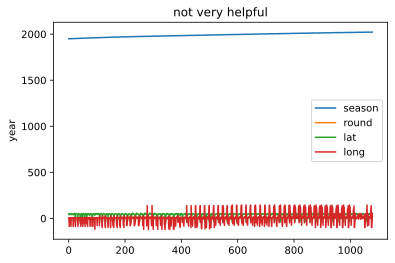

In [70]:
# the plot() method will generate line plots for all numeric columns by default
f1_races.plot(title='not very helpful', ylabel='year', alpha=1)

The `plot()` method returns an Axes object that can be modified further (e.g., to add reference lines, annotations, labels, etc.). Let's walk through an example.

In [71]:
f1_races.head()

,date,season,round,circuit_id,race_name,lat,long,locality,country
0,1950-05-13,1950,1,silverstone,British Grand Prix,52.0786,-1.01694,Silverstone,UK
1,1950-05-21,1950,2,monaco,Monaco Grand Prix,43.7347,7.42056,Monte-Carlo,Monaco
2,1950-05-30,1950,3,indianapolis,Indianapolis 500,39.7950,-86.23470,Indianapolis,USA
3,1950-06-04,1950,4,bremgarten,Swiss Grand Prix,46.9589,7.40194,Bern,Switzerland
4,1950-06-18,1950,5,spa,Belgian Grand Prix,50.4372,5.97139,Spa,Belgium


In [72]:
f1_races.tail(104)

,date,season,round,circuit_id,race_name,lat,long,locality,country
975,2017-11-26,2017,20,yas_marina,Abu Dhabi Grand Prix,24.4672,54.6031,Abu Dhabi,UAE
976,2018-03-25,2018,1,albert_park,Australian Grand Prix,-37.8497,144.9680,Melbourne,Australia
977,2018-04-08,2018,2,bahrain,Bahrain Grand Prix,26.0325,50.5106,Sakhir,Bahrain
978,2018-04-15,2018,3,shanghai,Chinese Grand Prix,31.3389,121.2200,Shanghai,China
979,2018-04-29,2018,4,baku,Azerbaijan Grand Prix,40.3725,49.8533,Baku,Azerbaijan
...,...,...,...,...,...,...,...,...,...
1074,2022-10-09,2022,18,suzuka,Japanese Grand Prix,34.8431,136.5410,Suzuka,Japan
1075,2022-10-23,2022,19,americas,United States Grand Prix,30.1328,-97.6411,Austin,USA
1076,2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,19.4042,-99.0907,Mexico City,Mexico
1077,2022-11-13,2022,21,interlagos,Brazilian Grand Prix,-23.7036,-46.6997,São Paulo,Brazil


In [73]:
# bar plots would be more useful for this dataset
f1_races.set_index('date', inplace=True)
plot_data = f1_races['2018-03-25':'2022-11-20']\
    .assign(race_month_order=lambda x: x.index.month)\
    .pivot_table(index='race_month_order', columns='season', values='round', aggfunc='count')

f1_races.reset_index(inplace=True)
plot_data.head(10)
# plot_data.info()


AttributeError: 'Index' object has no attribute 'month'

In [84]:
ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='rounds',
    figsize=(8, 1.5), title='f1_races per month'
)

# customize the legend
ax.legend(title='', loc='center', bbox_to_anchor=(-0.2, 0.5), ncol=1)

NameError: name 'plot_data' is not defined

# Let's find out some stuff
Using the `f1_results` dataset.

In [85]:
# first, clean up the data in the f1_results dataframe

f1_results.drop(columns='grid', inplace=True)

# lowercase all the columns so that they are easier to use

f1_results = f1_results.rename(columns=lambda x: x.lower())
f1_results.head()

KeyError: "['grid'] not found in axis"

In [86]:
# what columns are in this dataset?
f1_results.columns

Index(['season', 'Round', 'date', 'circuit_id', 'driver', 'DATE_of_birth',
       'nationality', 'constructor', 'GriD', 'tIME', 'Status', 'points',
       'podium'],
      dtype='object')

In [87]:
# how many distinct drivers are in the dataset?
distinct_drivers = len(f1_results.groupby('driver'))
print(distinct_drivers)

832


In [88]:
# which of those drivers are Austrian?

f1_results[f1_results['nationality']=='Austrian']['driver']


2941     rindt
3032     rindt
3061     rindt
3072     rindt
3097     rindt
         ...  
19117     wurz
19129     wurz
20225    klien
20299    klien
20321    klien
Name: driver, Length: 687, dtype: object

In [101]:
# what are the results from the latest race?

# f1_results.head()
f1_results['date'] = pd.to_datetime(f1_results['date'])
# f1_results.dtypes
# f1_results.sort_values('date').tail()
f1_results.iloc[f1_results['date'].argmax()]


# hint: you may use the date column; convert it to datetime first!


season                          2022
Round                             13
date             2022-07-31 00:00:00
circuit_id               hungaroring
driver                max_verstappen
DATE_of_birth             1997-09-30
nationality                    Dutch
constructor                 red_bull
GriD                              10
tIME                       5975912.0
Status                      Finished
points                          25.0
podium                             1
Name: 25187, dtype: object

In [ ]:
# who won the race? how many races has this pilot won this year?


# hints:
# get the winner by filterinf f1_results on 'date' and 'podium';
# then use iloc[i][j] to access the first (and only) row (i) of the dataframe and the 'driver' column (j)
# winner = f1_results[ ... filters ... ].iloc[i][j]


# use this ^ to filter f1_results on season, podium and driver
# and then count


In [ ]:
# on which circuit did Lewis Hamilton have the most wins?

# Formula 1 Driver Career Analysis
Let't analyse the career of one of the most succesful F1 drivers of all time.

Pick a driver from the list in [this article](https://www.redbull.com/ca-en/best-f1-drivers-of-all-time) and analyse their career below.

Or you can pick your favourite driver instead =)

In [102]:
# look for your driver's id in the list
f1_results['driver'].unique()

array(['farina', 'fagioli', 'reg_parnell', 'cabantous', 'rosier',
       'gerard', 'harrison', 'etancelin', 'hampshire', 'fry',
       'shawe_taylor', 'claes', 'fangio', 'kelly', 'bira', 'murray',
       'crossley', 'graffenried', 'chiron', 'martin', 'peter_walker',
       'rolt', 'leslie_johnson', 'ascari', 'sommer', 'villoresi',
       'gonzalez', 'manzon', 'trintignant', 'rol', 'schell', 'whitehead',
       'pian', 'parsons', 'holland', 'rose', 'green', 'bettenhausen',
       'chitwood', 'wallard', 'faulkner', 'george_connor', 'paul_russo',
       'flaherty', 'fohr', 'darter', 'hellings', 'mcgrath', 'ruttman',
       'hartley', 'davies', 'mcdowell', 'walt_brown', 'webb', 'hoyt',
       'ader', 'holmes', 'rathmann', 'banks', 'schindler', 'levrett',
       'cantrell', 'agabashian', 'bonetto', 'pagani', 'branca', 'levegh',
       'chaboud', 'pozzi', 'serafini', 'guy_mairesse', 'taruffi',
       'biondetti', 'louveau', 'comotti', 'sanesi', 'pietsch', 'moss',
       'fischer', 'abecassis

In [107]:
# which driver have you chosen?
driver = 'leclerc'

# what nationality is this driver?
nationality = 'monégasque'
print(f"{driver}'s nationality is {nationality}")


leclerc's nationality is monégasque


In [128]:
# when was his first race and for which constructor?
races = f1_results.head()
first_race_date = races.head(1)['date']
first_race_constructor = races.head(1)['constructor']
print(f"{driver}'s first race was on {first_race_date} with {first_race_constructor}")
# f1_races[f1_races['season'] == 2022]

leclerc's first race was on 0   1950-05-13
Name: date, dtype: datetime64[ns] with 0    alfa
Name: constructor, dtype: object


In [137]:
# when was his first podium + with which constructor?
# keep in mind the driver may have been on the podium 0 times
podiums = f1_results.podium
first_podium_date = 
first_podium_constructor = 
print(f"{driver}'s first podium was on {first_podium_date} with {first_podium_constructor}")


# f1_results[f1_results['season'] == 1999 ]

KeyError: 'date'

In [ ]:
# what about his first win + with which constructor + which circuit?
# keep in mind the driver may have won 0 races
first_win = ...
first_win_date = ...
first_win_constructor = ...
first_win_circuit = ...
print(f"{driver}'s first win was on {first_win_date} with {first_win_constructor} at {first_win_circuit}")

In [ ]:
# how many race starts?
# hint: check the Status is NOT one of Did not qualify, Did not prequalify, Not classified
race_starts = ...
print(f"{driver} has {race_starts} race starts")

In [ ]:
# how many of those races did he actually finished?
# hint: look for Status Finished; for this exercise, we'll not consider other statuses as successful
races_finished = ...
print(f"{driver} has finished {races_finished} races")

In [ ]:
# how many has he won?
races_won = ...
print(f"{driver} has won {races_won} races")

In [ ]:
# create a dataframe that contains the follwing information:
#
# driver
# nationality
# season
# circuit_id
# race_started (Boolean)
# race_finished (Boolean)
# race_won (Boolean)
# constructor

f1_career = ...

f1_career.head()

## Plotting the results

In [ ]:
# plot the race results per season

# prep the data
f1_career['race_started'] = f1_career['race_started'].astype(int)
f1_career['race_finished'] = f1_career['race_finished'].astype(int)
f1_career['race_won'] = f1_career['race_won'].astype(int)

plot_data_wins = f1_career.pivot_table(index="season", columns="driver", values="race_won", aggfunc="sum")
plot_data_start = f1_career.pivot_table(index="season", columns="driver", values="race_started", aggfunc="sum")


In [ ]:
plot_data_wins.plot(title=f"{driver}'s F1 Wins", ylabel="races")

In [ ]:
plot_data_start.plot(title=f"{driver}'s F1 Race Starts", ylabel="races")

### Combine the plots

In [ ]:
from functools import reduce

plot_data = reduce(lambda  left,right: pd.merge(left,right,on=["season"], how='inner'), [plot_data_start, plot_data_wins])
plot_data.rename(
    columns={
        f"{driver}_x": "starts",
        f"{driver}_y": "wins"
    }, inplace=True)
plot_data.head()

In [ ]:
plot_data.plot(title=f"{driver}'s F1 Career", ylabel="races")

### Export the results

In [ ]:
# explore more possibilities to store the results, e.g. to_sql()
f1_career.to_csv(f"./results/f1_career_{driver}.csv", index=False)

# Further reading
* [Loading a Dataframe from a SQL database](https://pythonspeed.com/articles/pandas-sql-chunking/)
* [Connecting to Redshift from Python](https://docs.aws.amazon.com/redshift/latest/mgmt/python-connect-examples.html)
* [Pandas I/O](https://pandas.pydata.org/docs/reference/io.html)